# load

> Loading HACC-hydro star formation history

In [ ]:
#| default_exp load

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()
from nbdev.showdoc import *
from fastcore.test import *

/home/nramachandra/anaconda3/envs/env_jax/lib/python3.9/site-packages/nbdev/export.py:54: UserWarning: Notebook '/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/nbs/index.ipynb' uses `#|export` without `#|default_exp` cell.
Note nbdev2 no longer supports nbdev1 syntax. Run `nbdev_migrate` to upgrade.
See https://nbdev.fast.ai/getting_started.html for more information.
  warn(f"Notebook '{nbname}' uses `#|export` without `#|default_exp` cell.\n"


In [ ]:
#| export
import numpy as np
import matplotlib.pylab as plt
from colossus.cosmology import cosmology
import haccytrees as haccT

In [ ]:
#| export
from paint_hydro.paint import *

In [ ]:
#| export
def cosmology_model(sim_name): # simulation name
    ''' 
    Cosmic Age of all snapshots
    '''
    sim = haccT.Simulation.simulations[sim_name]

    cosmo = cosmology.setCosmology(sim_name, dict(
        flat=True,
        H0=sim.cosmo.h*100,
        Om0=sim.cosmo.Omega_m,
        Ob0=sim.cosmo.Omega_b,
        sigma8=sim.cosmo.s8,
        ns=sim.cosmo.ns
    ))
    return cosmo

In [ ]:
#| export
def load_sfh(hacc_sfh_file): # input text file
    '''
    Load SFH text files
    '''
    cosmo = cosmology_model("AlphaQ")
    hacc_hydro_sm = np.loadtxt(hacc_sfh_file)
    hydro_sm = hacc_hydro_sm[:, 0]
    
    for indx in range(1, hydro_sm.shape[0]):
        if (hydro_sm[indx] > hydro_sm[indx-1]) :
            hydro_sm[indx] = hydro_sm[indx-1]-100
    
    hydro_tt = cosmo.age(z = hacc_hydro_sm[:, 1])
    return hydro_sm[::-1], hydro_tt[::-1]

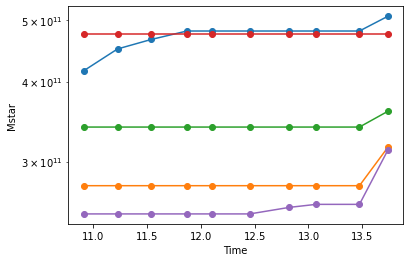

In [ ]:
#| hide
dirIn = '/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/Data/SFHs/'

plt.figure(32)

for galID in range(9, 14):
    fileIn = dirIn + 'gal' + str(galID) +'.txt'
    hydro_sm, hydro_tt = load_sfh(fileIn)
    plt.plot(hydro_tt, hydro_sm, '-o')
    
plt.xlabel('Time')
plt.ylabel('Mstar')
plt.yscale('log')

Text(0, 0.5, 'SFR')

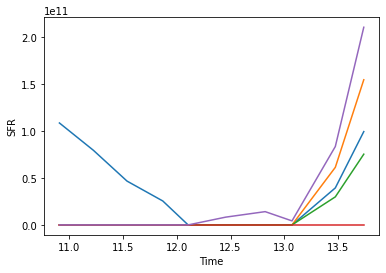

In [ ]:
#| hide
plt.figure(32)

for galID in range(9, 14):
    fileIn = dirIn + 'gal' + str(galID) +'.txt'
    hydro_sm, hydro_tt = load_sfh(fileIn)
    plt.plot(hydro_tt, np.gradient(hydro_sm)/np.gradient(hydro_tt))
    
plt.xlabel('Time')
plt.ylabel('SFR')

In [ ]:
#| hide
hydro_sm

array([2.4845445e+11, 2.4845445e+11, 2.4845445e+11, 2.4845445e+11,
       2.4845445e+11, 2.4845445e+11, 2.5437451e+11, 2.5715858e+11,
       2.5715858e+11, 3.1276900e+11])

In [ ]:
#| hide
hydro_tt

array([10.90894556, 11.2247792 , 11.53732605, 11.87015733, 12.10547211,
       12.45460894, 12.82188403, 13.07128233, 13.47390767, 13.73854003])

In [ ]:
#| hide
np.gradient(hydro_sm, hydro_tt)

array([3.16622381e+02, 3.18295959e+02, 3.10508728e+02, 3.73393066e+02,
       3.69182190e+02, 7.85538542e+09, 1.31673673e+10, 6.89325627e+09,
       1.26800430e+11, 2.10142173e+11])

In [ ]:
#| hide
np.diff(hydro_sm)

array([1.0000000e+02, 1.0000000e+02, 1.0000000e+02, 1.0000000e+02,
       1.0000000e+02, 5.9200600e+09, 2.7840699e+09, 1.0000000e+02,
       5.5610420e+10])

[3.16622381e+02 3.18295959e+02 3.10508728e+02 3.73393066e+02
 3.69182190e+02 7.85538542e+09 1.31673673e+10 6.89325627e+09
 1.26800430e+11 2.10142173e+11]


/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/paint_hydro/paint.py:128: RuntimeWarning: divide by zero encountered in double_scalars
  norm = formed_mass/mass0
/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/paint_hydro/paint.py:130: RuntimeWarning: invalid value encountered in double_scalars
  dust_mass = dust_mass0*norm
/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/paint_hydro/paint.py:332: RuntimeWarning: invalid value encountered in subtract
  spec_flux_nebe = spec_SED_temp1['flux'] - spec_SED_temp2['flux']
/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/paint_hydro/paint.py:341: RuntimeWarning: invalid value encountered in subtract
  spec_flux_duste = spec_SED_tot['flux'] - spec_SED_temp['flux']
/lcrc/project/cosmo_ai/nramachandra/Projects/Hydro_paint/paint_hydro/paint_hydro/paint.py:349: RuntimeWarning: invalid value encountered in subtract
  spec_flux_agn = spec_SED_tot['flux'] - spec_SED_tem

<matplotlib.legend.Legend>

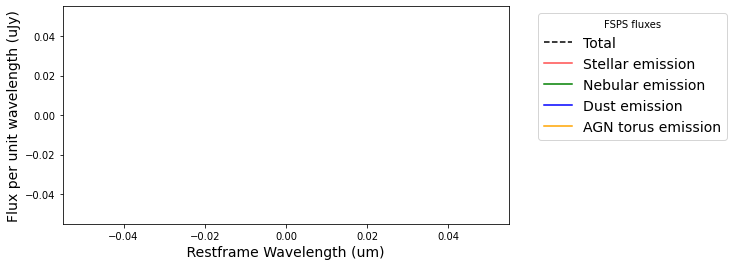

In [ ]:
#| hide


f, a = plt.subplots(1, 1, figsize = (8, 4))


hydro_sfr = np.gradient(hydro_sm, hydro_tt)
print(hydro_sfr)

if True:

    obs_spec = generate_modelSED_spec_decompose(sp=None,imf=1, duste_switch=1,add_neb_emission=1,dust_law=1,add_agn=1, 
                                                add_igm_absorption=0,igm_type=0,sfh_form=3, 
                                                sfh_t=hydro_tt, sfh_sfr=hydro_sfr, 
                                                funit='Jy',cosmo='flat_LCDM',H0=70.0,Om0=0.3,
                                                gas_logu=-2.0,params_val={'log_mass':9.0,'z':0.3,'log_fagn':-3.0,'log_tauagn':1.0,
                                                                          'log_qpah':0.54,'log_umin':0.0,
                                                                          'log_gamma':-2.0,'dust1':0.1,'dust2':0.5,'dust_index':-0.7,
                                                                          'log_age':1.0,'log_alpha':0.1,'log_beta':0.1,'log_t0':0.4,
                                                                          'log_tau':0.4,'logzsol':0.0})

    a.plot(obs_spec['wave']/1e4, 1e6*obs_spec['flux_total'], color = 'k', alpha=1.0, ls = 'dashed', label='Total');
    a.plot(obs_spec['wave']/1e4, 1e6*obs_spec['flux_stellar'], color = 'r', alpha=0.7, label='Stellar emission');
    a.plot(obs_spec['wave']/1e4, 1e6*obs_spec['flux_nebe'], color = 'g', alpha=1.0, label='Nebular emission');
    a.plot(obs_spec['wave']/1e4, 1e6*obs_spec['flux_duste'], color = 'b', alpha=1.0, label='Dust emission');
    a.plot(obs_spec['wave']/1e4, 1e6*obs_spec['flux_agn'], color = 'orange', alpha=1.0, label='AGN torus emission');


a.set_ylabel('Flux per unit wavelength (uJy)', fontsize=14)
a.set_xlabel(' Restframe Wavelength (um) ', fontsize=14)

# a.set_xscale('log')
# a.set_yscale('log')


plt.legend(title='FSPS fluxes', bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize=14)

# plt.xlim(8e2, 2e4)
# a.set_xlim(1000, 30000)
# a.set_xlim(0.1, 10)
# a.set_ylim(1e-6, 1e1)
# autoscale_y(a, margin=0.1)